In [1]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import manhattan_distances

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import work.prepare as wp

from work.prepare import assert_isDataFrame

RND_STATE = 42

In [2]:
data_all = pd.read_csv(Path("work/data/000_housing.csv"))
data_attr = data_all["median_income"]
data_attr.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

<AxesSubplot: >

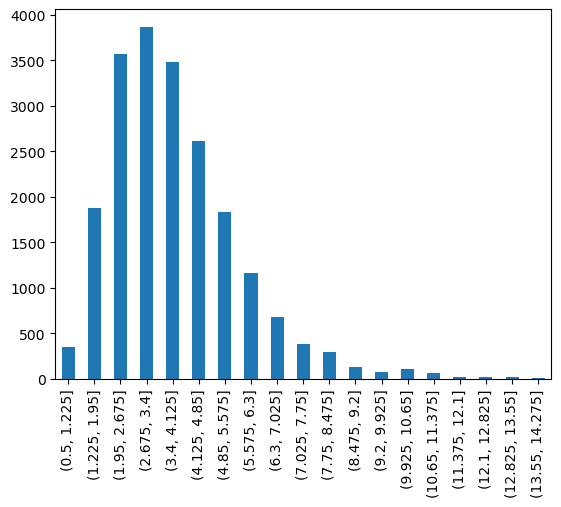

In [3]:
plot_bins = np.arange(data_attr.min(), data_attr.max(), (data_attr.max() - data_attr.min())/20)
pd.cut(data_attr, bins=plot_bins).value_counts().sort_index().plot.bar()

## Manual invalid

In [4]:
data_all.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
distr_bins_1 = np.append(np.append([-1 * np.inf], data_all["population"].quantile(q=np.arange(0, 1, 0.2)).to_numpy()[1:]), [np.inf])
distr_bins_1

array([  -inf,  710. , 1007. , 1348.4, 1908. ,    inf])

In [6]:
distr_data_1 = pd.cut(data_all["population"], bins=distr_bins_1, labels=np.arange(1, len(distr_bins_1), 1))
data_train_1, data_test_1 = train_test_split(data_all, test_size=0.2, stratify=distr_data_1, random_state=RND_STATE)
q1 = data_test_1["median_income"].quantile(q=np.arange(0, 1, 0.1))
q1

0.0    0.49990
0.1    1.90070
0.2    2.38088
0.3    2.78577
0.4    3.16158
0.5    3.54405
0.6    3.97040
0.7    4.43288
0.8    5.08470
0.9    6.17589
Name: median_income, dtype: float64

In [7]:
data_all["median_income"].quantile(q=np.arange(0, 1, 0.1))

0.0    0.49990
0.1    1.90380
0.2    2.35230
0.3    2.74010
0.4    3.14060
0.5    3.53480
0.6    3.96694
0.7    4.43750
0.8    5.10972
0.9    6.15921
Name: median_income, dtype: float64

In [8]:
qExp = data_all["median_income"].quantile(q=np.arange(0, 1, 0.1))
qExp

0.0    0.49990
0.1    1.90380
0.2    2.35230
0.3    2.74010
0.4    3.14060
0.5    3.53480
0.6    3.96694
0.7    4.43750
0.8    5.10972
0.9    6.15921
Name: median_income, dtype: float64

In [9]:
manhattan_distances([qExp], [q1])

array([[0.15736]])

## Manual distribution

<AxesSubplot: >

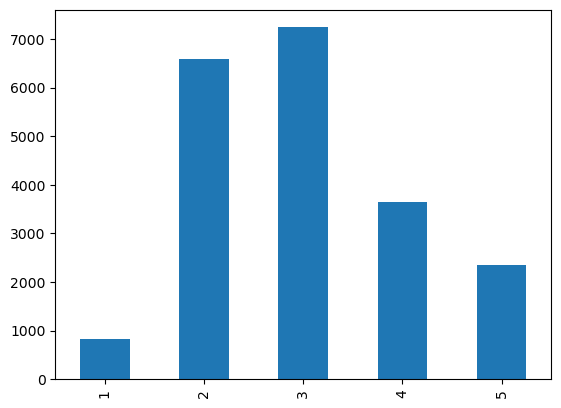

In [10]:
distr_bins_2 = [0, 1.5, 3.0, 4.5, 6.0, np.inf]
distr_data_2 = pd.cut(data_all["median_income"], bins=distr_bins_2, labels=np.arange(1, len(distr_bins_2), 1))
distr_data_2.value_counts().sort_index().plot.bar()

In [11]:
data_train_2, data_test_2 = train_test_split(data_all, test_size=0.2, stratify=distr_data_2, random_state=RND_STATE)
q2 = data_test_2["median_income"].quantile(q=np.arange(0, 1, 0.1))
manhattan_distances([qExp], [q2])

array([[0.10182]])

## Equal distribution

In [12]:
distr_bins_3 = np.append(np.append([-1 * np.inf], data_attr.quantile(q=np.arange(0, 1, 1.0/5)).to_numpy()[1:]), [np.inf])
distr_bins_3

array([   -inf, 2.3523 , 3.1406 , 3.96694, 5.10972,     inf])

<AxesSubplot: >

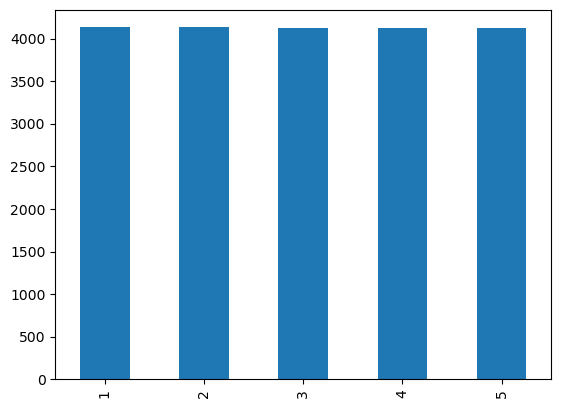

In [13]:
distr_data_3 = pd.cut(data_all["median_income"], bins=distr_bins_3, labels=np.arange(1, len(distr_bins_3), 1))
distr_data_3.value_counts().sort_index().plot.bar()

In [14]:
data_train_3, data_test_3 = train_test_split(data_all, test_size=0.2, stratify=distr_data_3, random_state=RND_STATE)
q3 = data_test_3["median_income"].quantile(q=np.arange(0, 1, 0.1))
manhattan_distances([qExp], [q3])

array([[0.06736]])

## split_distr

In [16]:
def split_distance(distr_gran):
  data_train, data_test = wp.split_distr(
    data_all, column_name="median_income", test_size=0.2, distr_gran=distr_gran, random_state=RND_STATE) 
  return manhattan_distances([qExp], [data_test["median_income"].quantile(q=np.arange(0, 1, 0.1))])

for i in range(3, 15):
  print(f'{i}: {split_distance(i)}')

3: [[0.10388]]
4: [[0.16933]]
5: [[0.06736]]
6: [[0.09754]]
7: [[0.08222]]
8: [[0.07974]]
9: [[0.09314]]
10: [[0.00406]]
11: [[0.04953]]
12: [[0.09593]]
13: [[0.04211]]
14: [[0.03837]]


In [17]:
data_train_t, data_test_t = wp.split_distr_bin(
    data_all, column_name="median_income", test_size=0.2, 
    distr_bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], 
    random_state=RND_STATE) 

manhattan_distances([qExp], [data_test_t["median_income"].quantile(q=np.arange(0, 1, 0.1))])

array([[0.10182]])